<a href="https://colab.research.google.com/github/QuanRy/SI-I-I_3_labs/blob/main/lab_3/colab_code_3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(tidyr)
library(RColorBrewer)

In [13]:
dataset = read.csv("alcohol-consumption.csv")

In [14]:
# смотрим на данные
str(dataset)
head(dataset)
any(is.na(dataset))
summary(dataset)

'data.frame':	189 obs. of  10 variables:
 $ country               : chr  "Estonia" "Lithuania" "Czech Republic" "Seychelles" ...
 $ total_consumption     : num  16.9 15 14.3 13.8 13.4 13.4 13 13 12.9 12.7 ...
 $ recorded_consumption  : num  15.8 13.8 12.4 12.4 11.3 9.6 11.3 11.5 11.1 11.4 ...
 $ unrecorded_consumption: num  1.1 1.2 1.4 1.4 1.4 3.8 1.4 1.4 1.9 1.3 ...
 $ beer_percentage       : num  32.7 43.6 53.3 68.9 52.6 7.9 47 35.4 42.8 38.8 ...
 $ wine_percentage       : num  7.4 7.3 21.3 22.4 28.4 0.4 28 44.6 11.1 17.2 ...
 $ spirits_percentage    : num  50.3 37.1 25.4 6.3 18.9 0.6 18.8 20 40 42.9 ...
 $ other_percentage      : num  9.6 12.1 0 2.5 0 91.1 6.2 0 6.1 1.2 ...
 $ X2020_projection      : num  11.5 14.4 11.2 10.4 12.8 13 13.5 12.6 14 13 ...
 $ X2025_projection      : num  11.9 13.9 11.4 10.6 12.6 12.5 13.9 12.4 15.1 13.4 ...


,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,X2020_projection,X2025_projection
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
2,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
3,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
4,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
5,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
6,Nigeria,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5


[1] TRUE

   country          total_consumption recorded_consumption
 Length:189         Min.   : 0.000    Min.   : 0.000      
 Class :character   1st Qu.: 2.400    1st Qu.: 1.400      
 Mode  :character   Median : 6.300    Median : 4.500      
                    Mean   : 6.184    Mean   : 4.923      
                    3rd Qu.: 9.400    3rd Qu.: 7.900      
                    Max.   :16.900    Max.   :15.800      
                                                          
 unrecorded_consumption beer_percentage  wine_percentage spirits_percentage
 Min.   :0.00           Min.   :  0.60   Min.   : 0.00   Min.   : 0.00     
 1st Qu.:0.80           1st Qu.: 28.30   1st Qu.: 2.15   1st Qu.:10.85     
 Median :1.30           Median : 39.90   Median : 8.50   Median :25.40     
 Mean   :1.38           Mean   : 43.48   Mean   :16.31   Mean   :29.39     
 3rd Qu.:1.80           3rd Qu.: 56.90   3rd Qu.:27.95   3rd Qu.:43.75     
 Max.   :5.30           Max.   :100.00   Max.   :84.70   Max.   :97.30  

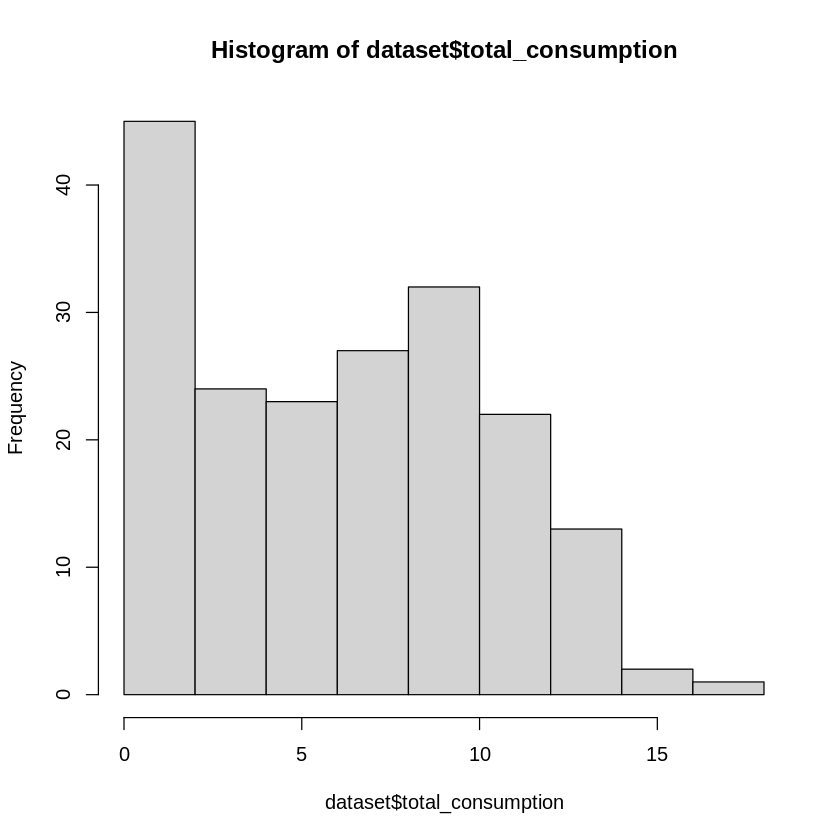

In [15]:
hist(dataset$total_consumption)

In [16]:
# предобработка: уберем пропуски в данных; удалим нецелевые признаки; 
df0 = data.frame(dataset)
df0 <- na.omit(df0)

df = subset(df0, select = -c(country ))

any(is.na(df))
nrow(df)

[1] FALSE

[1] 179

In [17]:
# нормализуем данные
df_scaled <- data.frame(scale(df))

head(df_scaled)
nrow(df_scaled)

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,X2020_projection,X2025_projection
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.607551,2.873238,-0.39688514,-0.486937687,-0.4914568,0.8700850,-0.05248298,1.2438113,1.2702204
2,2.130403,2.331232,-0.28174342,0.005221514,-0.4969746,0.3207045,0.05614853,1.9788551,1.7685644
3,1.954611,1.951828,-0.05145999,0.443198050,0.2755216,-0.1662464,-0.46962798,1.1677723,1.1456344
4,1.829046,1.951828,-0.05145999,1.147572687,0.3362177,-0.9611834,-0.36099647,0.9650016,0.9462968
5,1.728594,1.653724,-0.05145999,0.411591496,0.6672875,-0.4367747,-0.46962798,1.5733137,1.4446408
6,1.728594,1.193019,2.71194124,-1.606712750,-0.8777048,-1.1984159,3.48890427,1.6240064,1.4197236


[1] 179

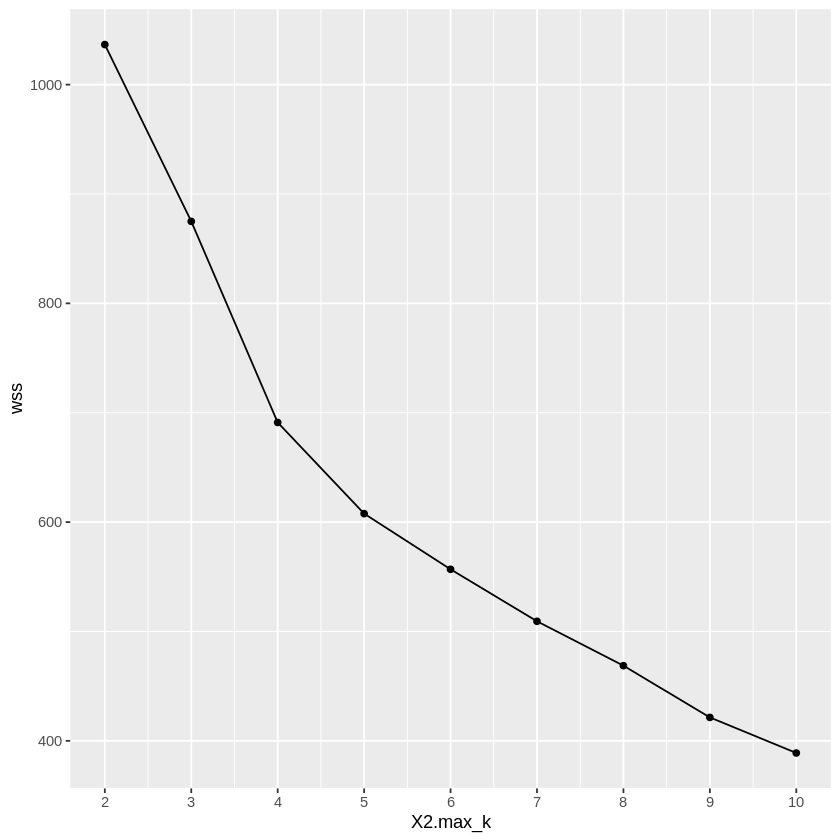

In [18]:
set.seed(42)

# функция запускает алгоритм k-mean и сохраняет сумму квадратов расстояния в кластерах
kmean_withinss <- function(dataset, k) {
    cluster <- kmeans(dataset, k)
    return (cluster$tot.withinss)
}

# Set maximum cluster 
max_k <- 10 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss, dataset = df_scaled)

# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

# Plot the graph with gglop
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = seq(1, max_k, by = 1))

In [19]:
optimal_k <- 3

# create clustering model
clust <- kmeans(df_scaled, optimal_k)

In [20]:
# информация о кластерах
# clust$cluster
clust$centers
clust$size

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,X2020_projection,X2025_projection
1,-1.0091307,-0.9651117,-0.60340917,0.44033124,-0.1547816,-0.4455611,0.16346957,-0.9995407,-1.0308633
2,-0.3361724,-0.3457702,0.05648537,-0.73908462,-0.6461284,1.5898463,-0.44084063,-0.3696415,-0.2660807
3,0.8849137,0.8555558,0.43103864,-0.04869239,0.3622303,-0.2714849,0.04533711,0.8904713,0.8745116


[1] 63 32 84

In [21]:
# присвоим метки кластеров исходному набору данных
df$Cluster <- clust$cluster
df$Cluster.Label <- as.character(clust$cluster)

df_scaled$Cluster <- clust$cluster
df_scaled$Cluster.Label <- as.character(clust$cluster)

head(df)

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,X2020_projection,X2025_projection,Cluster,Cluster.Label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,3,3
2,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,3,3
3,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,3,3
4,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,3,3
5,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,3,3
6,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5,3,3


In [22]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [23]:
# Построим тепловую карту
center <- clust$centers

# Create dataset with the cluster number
cluster <- c(1:nrow(center))
center_df <- data.frame(cluster, center)

# Reshape the data
center_reshape <- gather(center_df, features, values, total_consumption:X2025_projection)
head(center_reshape)

,cluster,features,values
,<int>,<chr>,<dbl>
1,1,total_consumption,-1.0091307
2,2,total_consumption,-0.3361724
3,3,total_consumption,0.8849137
4,1,recorded_consumption,-0.9651117
5,2,recorded_consumption,-0.3457702
6,3,recorded_consumption,0.8555558


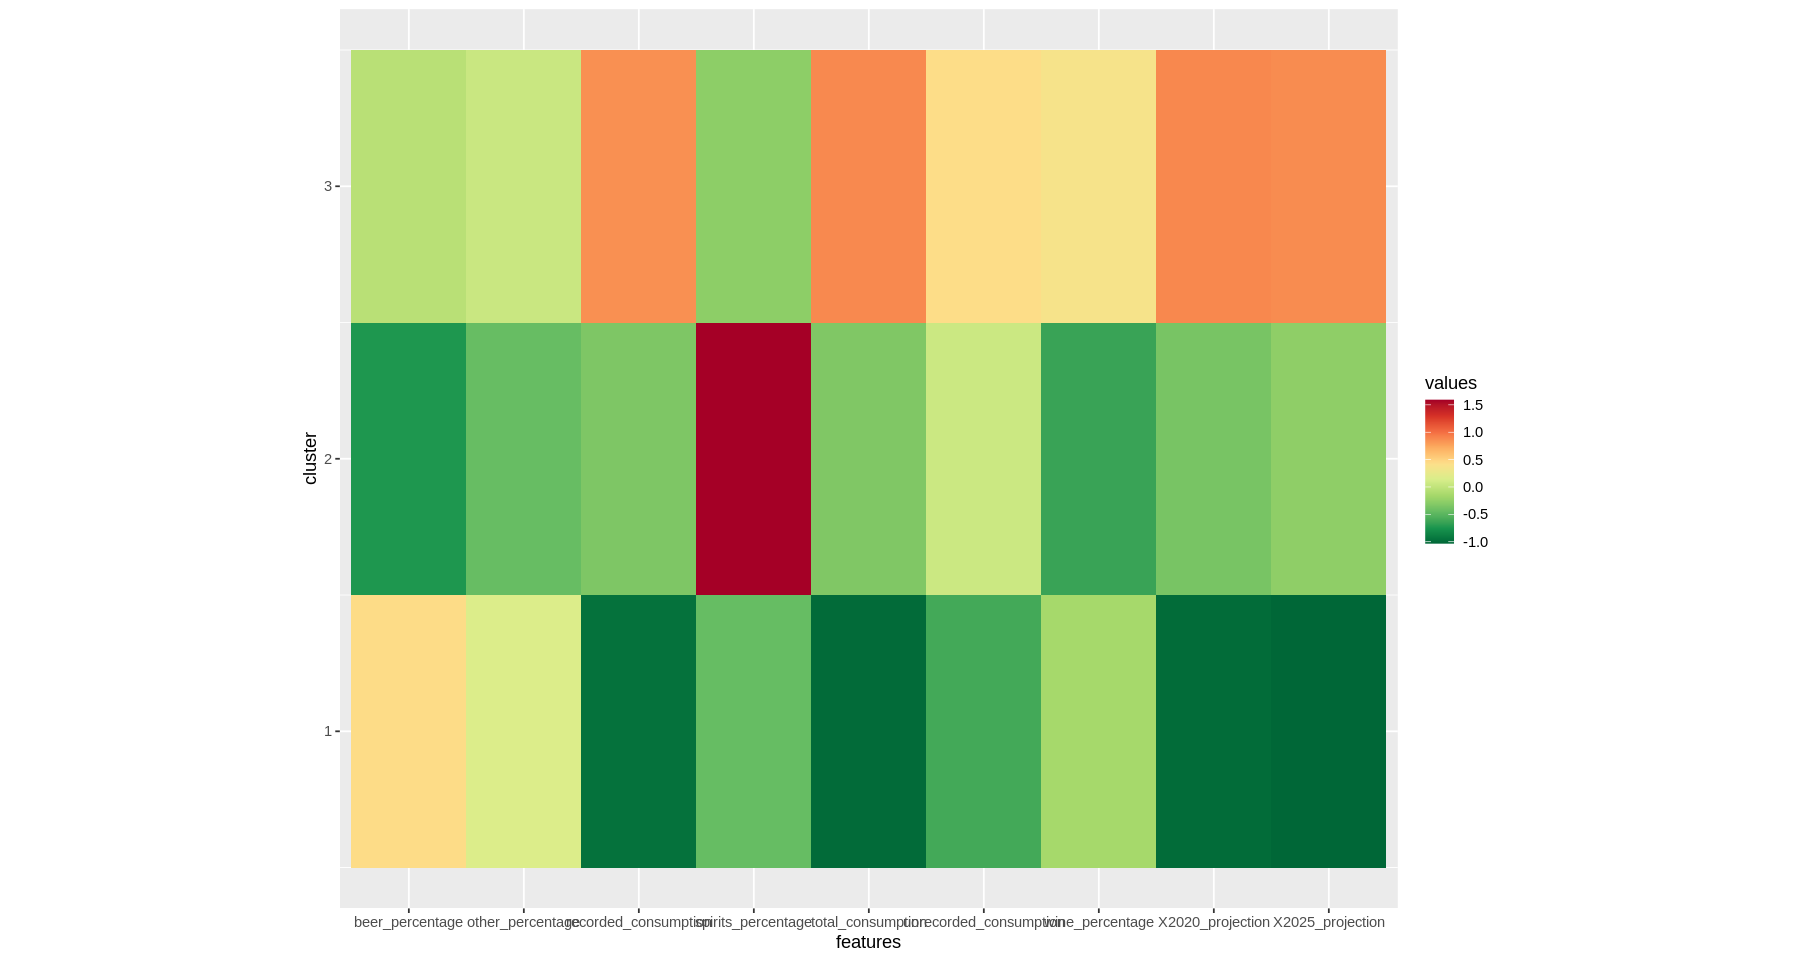

In [24]:
# Create the palette
hm.palette <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')), space='Lab')

# Plot the heat map
ggplot(data = center_reshape, aes(x = features, y = cluster, fill = values)) +
    scale_y_continuous(breaks = seq(1, 8, by = 1)) +
    geom_tile() +
    coord_equal() +
    scale_fill_gradientn(colours = hm.palette(50)) +
    theme(aspect.ratio = 0.85)

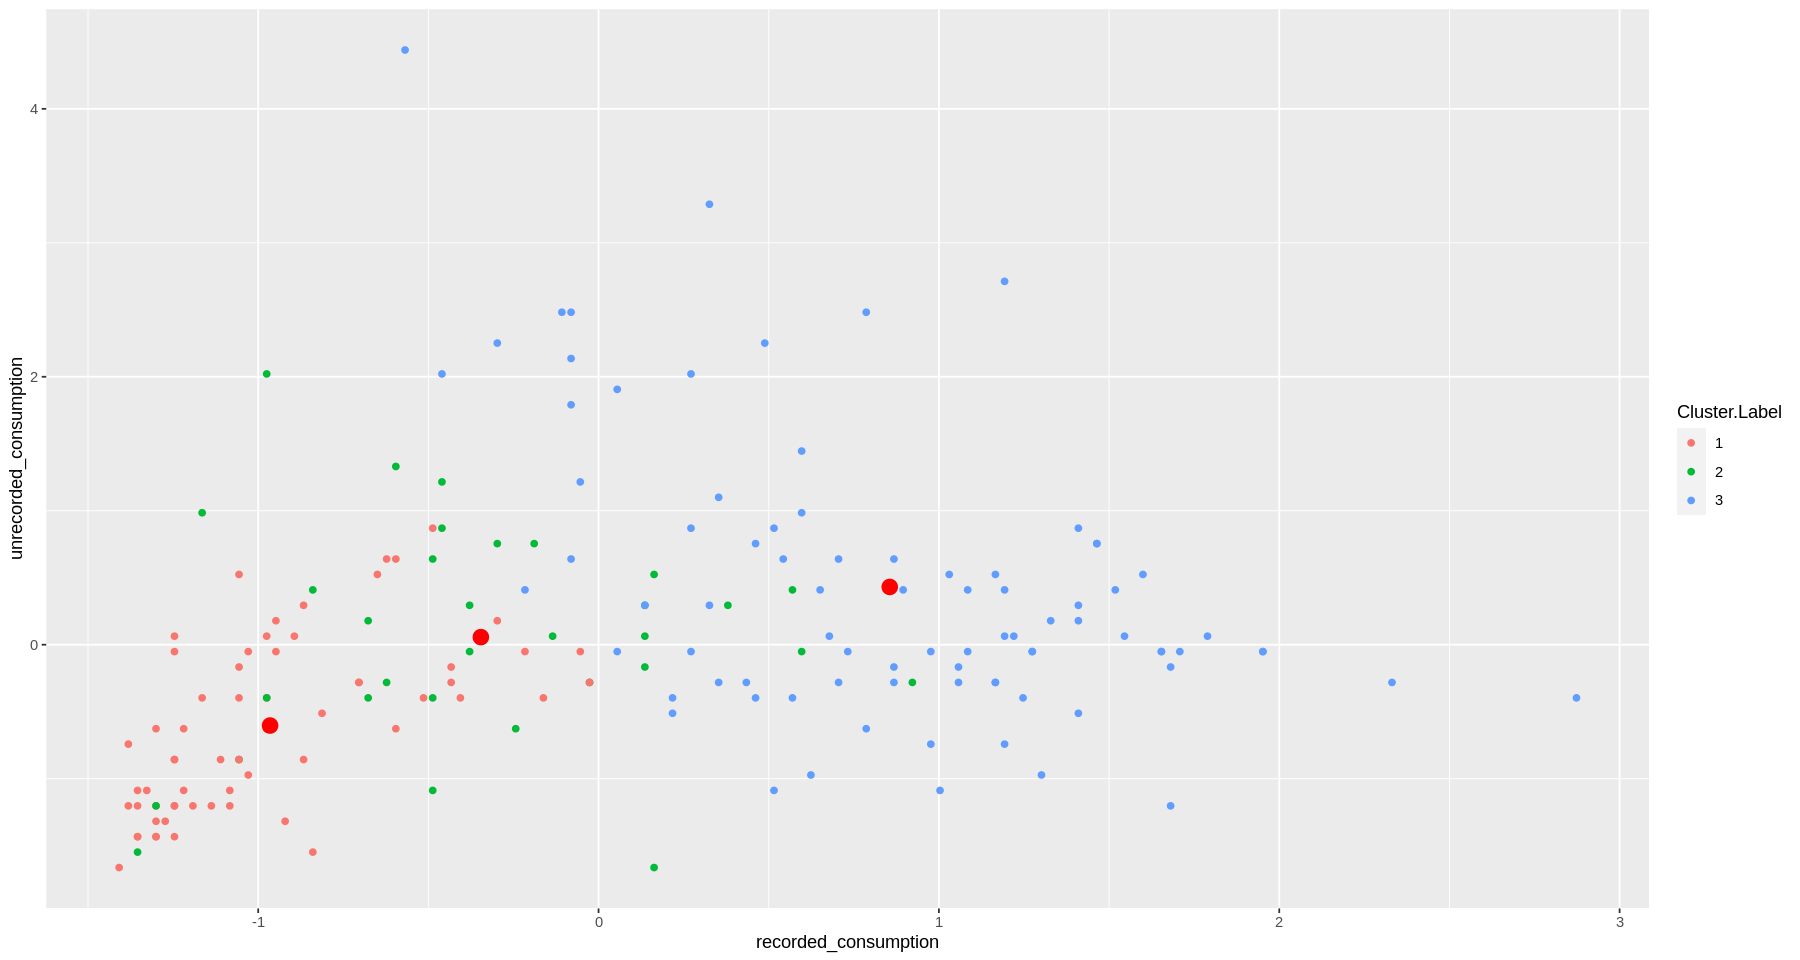

In [26]:
# визуализация данных в разрезе возраста и дохода покупателя с центрами кластеров
ggplot() +
  geom_point(data = df_scaled, mapping = aes(x = recorded_consumption  , y = unrecorded_consumption, colour = Cluster.Label)) +
    geom_point(mapping = aes_string(x = clust$centers[, "recorded_consumption"], 
                                  y = clust$centers[, "unrecorded_consumption"]),
                                  color = "red", size = 4)

# Часть 2


In [27]:
# libraries
install.packages("naivebayes")
install.packages("psych")

library(naivebayes)
library(dplyr)
library(ggplot2)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


naivebayes 0.9.7 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [38]:
# считываем датасет
getwd()
data <- read.csv('gender_classification_v7.csv')

[1] "/content"

In [39]:
# содержимое данных
str(data)
summary(data) 

'data.frame':	5001 obs. of  8 variables:
 $ long_hair                : int  1 0 0 0 1 1 1 0 1 1 ...
 $ forehead_width_cm        : num  11.8 14 11.8 14.4 13.5 13 15.3 13 11.9 12.1 ...
 $ forehead_height_cm       : num  6.1 5.4 6.3 6.1 5.9 6.8 6.2 5.2 5.4 5.4 ...
 $ nose_wide                : int  1 0 1 0 0 1 1 0 1 0 ...
 $ nose_long                : int  0 0 1 1 0 1 1 0 0 0 ...
 $ lips_thin                : int  1 1 1 1 0 1 1 0 1 0 ...
 $ distance_nose_to_lip_long: int  1 0 1 1 0 1 0 0 1 0 ...
 $ gender                   : chr  "Male" "Female" "Male" "Male" ...


   long_hair      forehead_width_cm forehead_height_cm   nose_wide     
 Min.   :0.0000   Min.   :11.40     Min.   :5.100      Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:12.20     1st Qu.:5.500      1st Qu.:0.0000  
 Median :1.0000   Median :13.10     Median :5.900      Median :0.0000  
 Mean   :0.8696   Mean   :13.18     Mean   :5.946      Mean   :0.4939  
 3rd Qu.:1.0000   3rd Qu.:14.00     3rd Qu.:6.400      3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :15.50     Max.   :7.100      Max.   :1.0000  
   nose_long        lips_thin      distance_nose_to_lip_long    gender         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000            Length:5001       
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000            Class :character  
 Median :1.0000   Median :0.0000   Median :0.0000            Mode  :character  
 Mean   :0.5079   Mean   :0.4931   Mean   :0.4989                              
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000                              
 Max.   :1.0000 

In [40]:
# поля nose_long и nose_wide категориальные переменные, приведем к фактору (строка-категория)
data$nose_wide <- as.factor(data$nose_wide)
data$nose_long <- as.factor(data$nose_long)

In [42]:
# разбиение выборки на обучающую и тестовую выборки в пропорции 80% к 20% соответственно
set.seed(42)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.8,.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [43]:
# модель Naive Bayes; admit как функция для всех остальных данных (.)
model <- naive_bayes(nose_long ~ ., data = train,  usekernel = T)
model


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = nose_long ~ ., data = train, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

        0         1 
0.4960967 0.5039033 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: long_hair::0 (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (1970 obs.);	Bandwidth 'bw' = 0.06853

       x                 y           
 Min.   :-0.2056   Min.   :0.000000  
 1st Qu.: 0.1472   1st Qu.:0.000031  
 Median : 0.5000   Median :0.069111  
 Mean   : 0.5000   Mean   :0.707017  


In [44]:
#plot(model)

In [45]:
# предсказание на тренировочно выборке
p <- predict(model, train, type= 'prob')
head(cbind(p, train))

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


,0,1,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<chr>
3,0.0064744985,0.993525501,0,11.8,6.3,1,1,1,1,Male
5,0.9975559884,0.002444012,1,13.5,5.9,0,0,0,0,Female
6,0.0005111325,0.999488868,1,13.0,6.8,1,1,1,1,Male
7,0.0074120372,0.992587963,1,15.3,6.2,1,1,1,0,Male
8,0.9978658434,0.002134157,0,13.0,5.2,0,0,0,0,Female
9,0.2055206570,0.794479343,1,11.9,5.4,1,0,1,1,Female


In [46]:
cat("# Misclassification error - train data:")
p1 <- predict(model, within(train, rm(nose_long)))
(tab1 <- table(p1, train$nose_long))
1 - sum(diag(tab1))/ sum(tab1)

cat("\n# Misclassification error - test data")
p2 <- predict(model, within(test, rm(nose_long)))
(tab2 <- table(p2, test$nose_long))
1 - sum(diag(tab2))/ sum(tab2)

# Misclassification error - train data:

   
p1     0    1
  0 1717  272
  1  253 1729

[1] 0.1322085


# Misclassification error - test data

   
p2    0   1
  0 441  74
  1  50 465

[1] 0.1203883

In [60]:
# конструируем аналогичный фактор  
nose_wide = as.factor(1:2)

# новые данные из 3х элементов
new <- data.frame(long_hair=c(0, 1, 1), forehead_width_cm=c(12, 13, 15), forehead_height_cm=c(5, 6, 7), lips_thin=c(0, 0, 1), distance_nose_to_lip_long=c(0, 0, 1), nose_wide=nose_wide[c(0, 0, 1)])
new$nose_wide <- as.factor(new$nose_wide)
new$forehead_width_cm <- as.integer(new$forehead_width_cm)

# метки
p3 <- predict(model, new)

cbind(nose_long=p3, new)

Warning message:
“predict.naive_bayes(): only 6 feature(s) out of 7 defined in the naive_bayes object "model" are used for prediction.
”


nose_long,long_hair,forehead_width_cm,forehead_height_cm,lips_thin,distance_nose_to_lip_long,nose_wide
<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
0,0,12,5,0,0,1
0,1,13,6,0,0,1
1,1,15,7,1,1,1
